In [1]:
%pylab inline
import calin.math.hex_array

Populating the interactive namespace from numpy and matplotlib


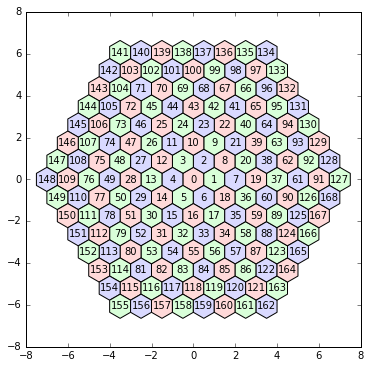

In [2]:
figure(figsize=[6,6])
axis([-8,8,-8,8])
c = [[1,.85,.85],[.85,1,.85],[.85,.85,1]]
for i in range(0,calin.math.hex_array.ringid_to_nsites_contained(7)):
    u,v = calin.math.hex_array.hexid_to_uv(i)
    x,y = calin.math.hex_array.uv_to_xy(u,v)
    ii = calin.math.hex_array.uv_to_hexid(u,v)
    ic = (u-v)%3
    xv,yv = calin.math.hex_array.hexid_to_vertexes_xy(i)
    xyv = array([xv,yv])
    gca().add_patch(Polygon(xyv.transpose(),facecolor=c[ic],fill=True))
    text(x,y,'%d'%ii,ha='center',va='center')
    hold('on')

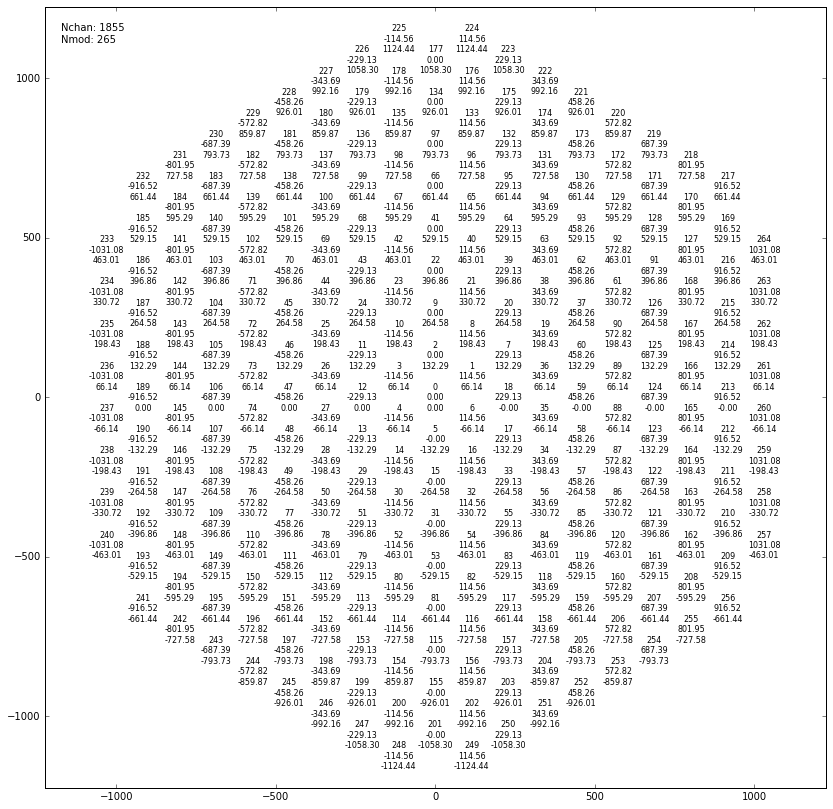

In [3]:
figure(figsize=[14,14])
spacing = 50
rad = 23.5*spacing
axis(asarray([-1,1,-1,1])*(rad+spacing))
nchan = 0
nmod = 0
u1,v1 = calin.math.hex_array.cluster_hexid_to_center_uv(1,1)
x1,y1 = calin.math.hex_array.uv_to_xy(u1,v1)
rot = arctan2(-y1,x1) + 30/180*pi
crot = cos(rot)
srot = sin(rot)
for i in range(0,calin.math.hex_array.ringid_to_nsites_contained(9)):
    uc,vc = calin.math.hex_array.cluster_hexid_to_center_uv(i,1)
    xxc,yyc = calin.math.hex_array.uv_to_xy(uc,vc)
    xc = spacing*(crot*xxc - srot*yyc)
    yc = spacing*(crot*yyc + srot*xxc)
    if(xc*xc+yc*yc > rad*rad):
        continue
    text(xc,yc,'%d\n%.2f\n%.2f'%(nmod,xc,yc),ha='center',va='center',fontsize=8)
    nchan=nchan+7
    nmod = nmod+1
#gca().add_patch(Circle((0,0),rad,color='r',fill=False))
text(-rad,rad,'Nchan: %d\nNmod: %d\n'%(nchan,nmod),va='top')

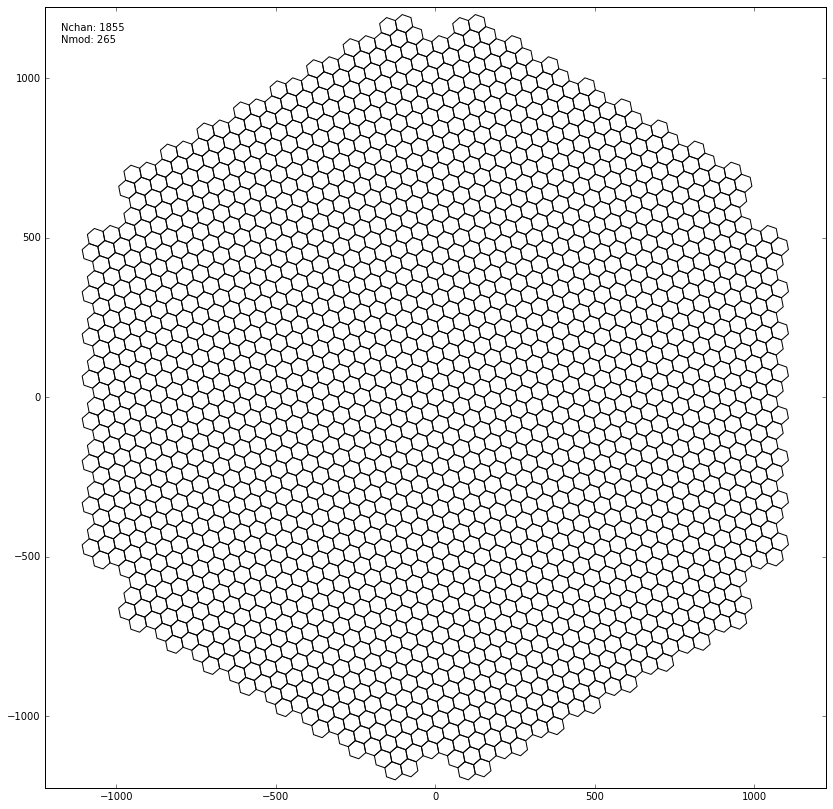

In [4]:
figure(figsize=[14,14])
spacing = 50
rad = 23.5*spacing
axis(asarray([-1,1,-1,1])*(rad+spacing))
nchan = 0
nmod = 0
u1,v1 = calin.math.hex_array.cluster_hexid_to_center_uv(1,1)
x1,y1 = calin.math.hex_array.uv_to_xy(u1,v1)
rot = arctan2(-y1,x1) + 30/180*pi
crot = cos(rot)
srot = sin(rot)
for i in range(0,calin.math.hex_array.ringid_to_nsites_contained(9)):
    uc,vc = calin.math.hex_array.cluster_hexid_to_center_uv(i,1)
    xxc,yyc = calin.math.hex_array.uv_to_xy(uc,vc)
    xc = spacing*(crot*xxc - srot*yyc)
    yc = spacing*(crot*yyc + srot*xxc)
    if(xc*xc+yc*yc > rad*rad):
        continue
    fillme=False
    c='w'
    um,vm = calin.math.hex_array.cluster_hexid_to_member_uv(i,1)
    for k in range(0,len(um)):
        u = um[k]
        v = vm[k]
        xxv, yyv = calin.math.hex_array.uv_to_vertexes_xy(u,v)
        xv = spacing*(crot*asarray(xxv) - srot*asarray(yyv))
        yv = spacing*(crot*asarray(yyv) + srot*asarray(xxv))
        xyv = array([xv, yv])
        gca().add_patch(Polygon(xyv.transpose(),facecolor=c,edgecolor='k',fill=fillme))
        fillme = False
        c='w'
        nchan=nchan+1
    nmod = nmod+1
text(-rad,rad,'Nchan: %d\nNmod: %d\n'%(nchan,nmod),va='top')

[-1.5, 1.5, -1.5, 1.5]

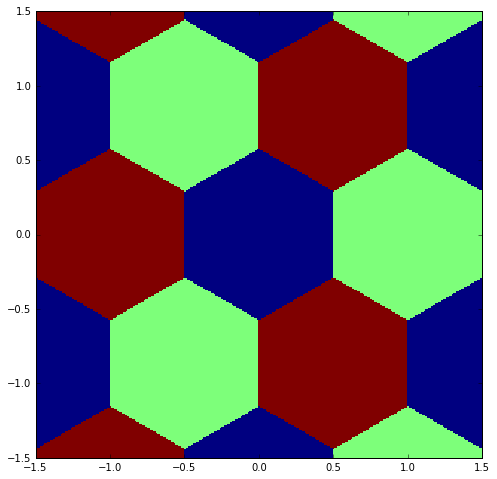

In [5]:
figure(figsize=(8,8))
xg = frange(-1.5+0.001,1.5,0.01)
yg = frange(-1.5+0.001,1.5,0.01)
id = zeros((len(xg),len(yg)))
for i in range(0,len(xg)):
    for j in range(0,len(yg)):
        u,v = calin.math.hex_array.hexid_to_uv(calin.math.hex_array.xy_to_hexid(xg[i],yg[j]))
        id[i,j] = (u-v)%3
pcolor(xg,yg,id.transpose())
axis([-1.5,1.5,-1.5,1.5])

[-1.5, 1.5, -1.5, 1.5]

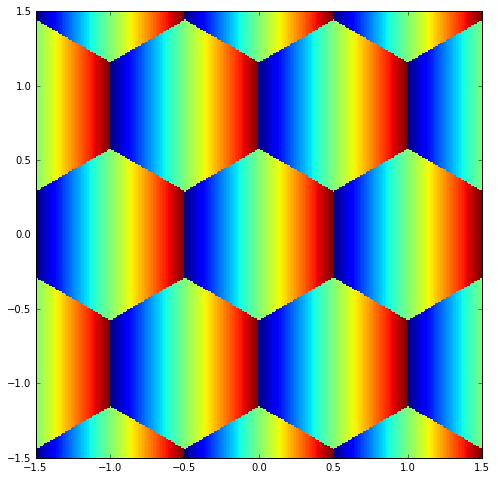

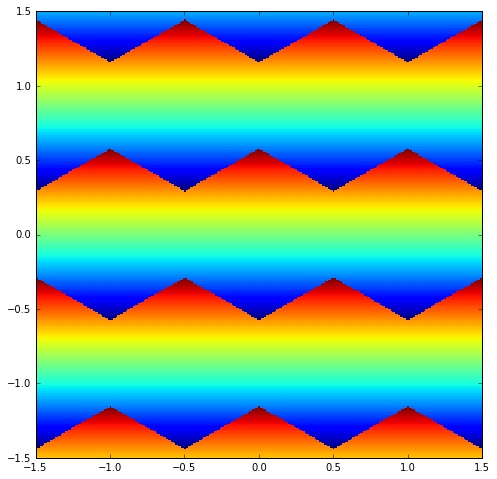

In [6]:
xg = frange(-1.5+0.001,1.5,0.01)
yg = frange(-1.5+0.001,1.5,0.01)
xx = zeros((len(xg),len(yg)))
yy = zeros((len(xg),len(yg)))
for i in range(0,len(xg)):
    for j in range(0,len(yg)):
        ii,x,y = calin.math.hex_array.xy_to_hexid_with_remainder(xg[i],yg[j])
        xx[i,j] = x
        yy[i,j] = y
figure(figsize=(8,8))
pcolor(xg,yg,xx.transpose())
axis([-1.5,1.5,-1.5,1.5])

figure(figsize=(8,8))
pcolor(xg,yg,yy.transpose())
axis([-1.5,1.5,-1.5,1.5])
